In [4]:
# Dependencies
import os
import glob
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

In [5]:
#to get the different categories from categories.json in Resources

restaurant_categories = []

with open('Resources/categories.json') as json_file:
    cats = json.load(json_file)
    
    for category in cats:
        try:
            if category['parents'][0]=='restaurants':
                restaurant_categories.append(category['alias'])
            
        except Exception as e:
            #print(f'Restaurant not found. Skipping...')
            pass  # no operation

print(len(restaurant_categories))

190


In [7]:
cities = ["Carlsbad,CA", "Encinitas,CA", "Oceanside,CA", "San Marcos,CA"]
name_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []
total_count_dict = {
    "Oceanside,CA": [],
    "Encinitas,CA":[],
    "Carlsbad,CA":[],
    "San Marcos,CA": []
}

city_list = []

for city in cities:
    print(city)
    
    for category in restaurant_categories:
      
        filename = f"Resources/{city}/{category}.json"
        #print(filename)
        with open(filename) as json_file:
            restaurants_json = json.load(json_file)
            total_count_dict[city].append(restaurants_json['total'])
            
            for restaurant in restaurants_json['businesses']:
                try:
                    city_list.append(city)
                    name_list.append(restaurant['name'])

                    category_list.append(category) 

                    review_count_list.append(restaurant['review_count'])
                    rating_list.append(restaurant['rating'])

                    #if restaurant does not have a restaurant['price'] value, provide a value (but how?)
                    #https://stackoverflow.com/questions/24898797/check-if-key-exists-and-iterate-the-json-array-using-python
                    if 'price' not in restaurant:
                        price_list.append("0")
                    else:
                        price_list.append(len(restaurant['price']))
                except Exception as e:
                    print (e)

print(len(total_count_dict['Oceanside,CA']))                  
print(len(name_list))
print(len(category_list))
print(len(review_count_list))
print(len(rating_list))
print(len(price_list))

Carlsbad,CA
Encinitas,CA
Oceanside,CA
San Marcos,CA
190
9307
9307
9307
9307
9307


In [8]:
#Total Restaurant Count per Category
total_restaurant_df = pd.DataFrame(total_count_dict)
total_restaurant_df['Category'] = restaurant_categories
total_restaurant_df.head()

,"Oceanside,CA","Encinitas,CA","Carlsbad,CA","San Marcos,CA",Category
0,14,5,13,13,afghani
1,11,10,11,10,african
2,0,0,0,0,andalusian
3,8,4,7,7,arabian
4,16,23,26,27,argentine


In [9]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
total_restaurant_df.reset_index(inplace=True)
OCE_Asian_Restarants_total_count = total_restaurant_df.loc[total_restaurant_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_total_count

,index,"Oceanside,CA","Encinitas,CA","Carlsbad,CA","San Marcos,CA",Category
6,6,25,47,36,35,asianfusion
40,40,51,100,66,73,chinese
53,53,0,0,0,0,dumplings
93,93,46,94,68,67,japanese
97,97,6,19,7,7,korean
104,104,4,0,1,1,malaysian
121,121,8,20,10,14,noodles
164,164,52,108,78,77,sushi
175,175,25,48,36,39,thai
185,185,19,50,26,29,vietnamese


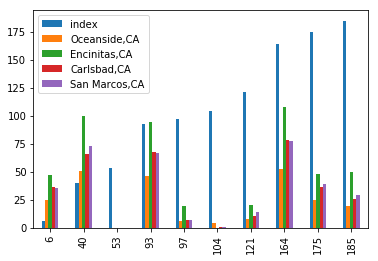

In [10]:
OCE_Asian_Restarants_total_count.plot(kind="bar")

In [11]:
restaurants_df = pd.DataFrame({
    "City": city_list,
    "Category": category_list,
    "Name": name_list,
    "Rating": rating_list,
    "Review Count": review_count_list,
    "Price":price_list
})
restaurants_df['Price']= pd.to_numeric(restaurants_df['Price'])
restaurants_df.head()

,City,Category,Name,Rating,Review Count,Price
0,"Carlsbad,CA",afghani,Baba Kabob,5.0,30,0
1,"Carlsbad,CA",afghani,Pamir Kabob House,4.5,189,2
2,"Carlsbad,CA",afghani,Ariana Cuisine,4.5,165,1
3,"Carlsbad,CA",afghani,Ariana Kabob House,4.5,446,2
4,"Carlsbad,CA",afghani,Kabul West,4.0,97,1


In [12]:
#Restaurant Rating - Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_rating = oceanside_df.groupby("Category")['Rating'].agg('mean')
oceanside_restaurant_rating = pd.DataFrame(oceanside_restaurant_rating)
#oceanside_restaurant_rating.head()

In [13]:
#Restaurant Rating - Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_rating = carlsbad_df.groupby("Category")['Rating'].agg('mean')
carlsbad_restaurant_rating_df = pd.DataFrame(carlsbad_restaurant_rating)
#carlsbad_restaurant_rating_df.head()

In [14]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad, Encinitas
restaurant_rating = pd.merge(oceanside_restaurant_rating,carlsbad_restaurant_rating_df, on="Category", how="outer")
restaurant_rating_df = restaurant_rating.rename(columns={"Rating_x": "Avg Oceanside Restaurant Rating", "Rating_y":"Avg Carlsbad Restaurant Rating"})
#restaurant_rating_df.head()

In [15]:
#Restaurant Rating - Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_rating = encinitas_df.groupby("Category")['Rating'].agg('mean')
encinitas_restaurant_rating_df = pd.DataFrame(encinitas_restaurant_rating)
#encinitas_restaurant_rating_df.head()

In [16]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad, Encinitas
OCE_restaurant_rating = pd.merge(restaurant_rating_df,encinitas_restaurant_rating_df, on="Category", how="outer")
OCE_restaurant_rating.rename(columns={"Rating": "Avg Encinitas Restaurant Rating"},inplace=True)
OCE_restaurant_rating.head()

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
Category,,,
afghani,3.964286,4.038462,4.500000
african,4.227273,4.227273,4.250000
arabian,4.375000,4.357143,4.250000
argentine,4.187500,4.134615,4.152174
armenian,4.500000,4.750000,NaN


In [17]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_restaurant_rating.reset_index(inplace=True)
OCE_Asian_Restarants_rating_mean = OCE_restaurant_rating.loc[OCE_restaurant_rating['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_rating_mean

,Category,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
5,asianfusion,3.680000,3.722222,3.712766
27,chinese,3.310000,3.530000,3.740000
60,japanese,3.804348,3.900000,4.000000
62,korean,3.833333,3.857143,3.868421
66,malaysian,4.250000,4.000000,NaN
75,noodles,3.562500,3.650000,3.775000
102,sushi,3.860000,3.930000,4.030000
108,thai,3.940000,3.958333,3.895833
114,vietnamese,4.026316,4.057692,3.970000


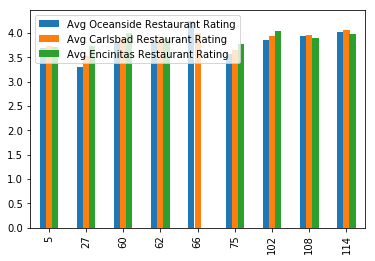

In [18]:
OCE_Asian_Restarants_rating_mean.plot(kind="bar")

In [19]:
#Review Count

In [20]:
#Restaurant Review Count Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_review_count = oceanside_df.groupby("Category")['Review Count'].agg('sum')
oceanside_restaurant_review_count_df = pd.DataFrame(oceanside_restaurant_review_count)
#oceanside_restaurant_review_count_df.head()

In [21]:
#Restaurant Review Count Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_review_count = carlsbad_df.groupby("Category")['Review Count'].agg('sum')
carlsbad_restaurant_review_count_df = pd.DataFrame(carlsbad_restaurant_review_count)
#carlsbad_restaurant_review_count_df.head()

In [22]:
#Restaurant Review Count Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_review_count = encinitas_df.groupby("Category")['Review Count'].agg('sum')
encinitas_restaurant_review_count_df = pd.DataFrame(encinitas_restaurant_review_count)
#encinitas_restaurant_review_count_df.head()

In [23]:
OC_review_count = pd.merge(oceanside_restaurant_review_count_df,carlsbad_restaurant_review_count_df, on="Category", how="outer")
OC_review_count.head()
OC_review_count_df = OC_review_count.rename(columns={"Review Count_x": "Oceanside Review Count",
                                 "Review Count_y": "Carlsbad Review Count"})
#OC_review_count_df.head()

In [24]:
OCE_review_count = pd.merge(OC_review_count_df,encinitas_restaurant_review_count_df, on="Category", how="outer")
OCE_review_count_df = OCE_review_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_review_count_df.head()

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
afghani,3346.0,3321.0,927.0
african,2805.0,2805.0,2526.0
arabian,1835.0,1467.0,721.0
argentine,4178.0,3993.0,3109.0
armenian,2715.0,489.0,NaN


In [25]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_review_count_df.reset_index(inplace=True)
OCE_Asian_Restarants_review_count = OCE_review_count_df.loc[OCE_review_count_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_review_count

,Category,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
5,asianfusion,5877.0,8843.0,10974.0
27,chinese,5943.0,9682.0,12128.0
60,japanese,13780.0,15500.0,16631.0
62,korean,1648.0,2132.0,6237.0
66,malaysian,1488.0,732.0,NaN
75,noodles,2302.0,2662.0,5284.0
102,sushi,17818.0,18860.0,19105.0
108,thai,7688.0,10792.0,15319.0
114,vietnamese,5437.0,8202.0,15707.0


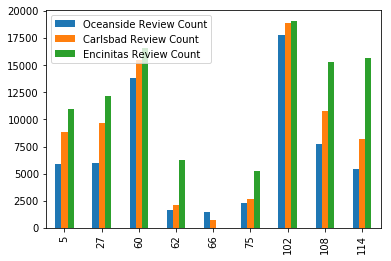

In [26]:
OCE_Asian_Restarants_review_count.plot(kind="bar")

In [27]:
#Price 

In [28]:
#Restaurant Price Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_price = oceanside_df.groupby("Category")['Price'].agg('mean')
oceanside_restaurant_price_df = pd.DataFrame(oceanside_restaurant_price)
#oceanside_restaurant_price_df.head()

In [29]:
#Restaurant Price Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_price = carlsbad_df.groupby("Category")['Price'].agg('mean')
carlsbad_restaurant_price_df = pd.DataFrame(carlsbad_restaurant_price)
#carlsbad_restaurant_price_df.head()

In [30]:
#Restaurant Price Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_price = encinitas_df.groupby("Category")['Price'].agg('mean')
encinitas_restaurant_price_df = pd.DataFrame(encinitas_restaurant_price)
#encinitas_restaurant_price_df.head()

In [31]:
#Price merge Oceanside and Carlsbad
OC_price_mean = pd.merge(oceanside_restaurant_price_df,carlsbad_restaurant_price_df, on="Category", how="outer")
OC_price_mean.head()
OC_price_mean_df = OC_price_mean.rename(columns={"Price_x": "Oceanside Mean Price Per Category",
                                 "Price_y": "Carlsbad Mean Price Per Category"})
#OC_price_mean_df.head()

In [32]:
#Price merge Oceanside, Carlsbad, Encinitas
OCE_price_mean = pd.merge(OC_price_mean_df,encinitas_restaurant_price_df, on="Category", how="outer")
OCE_price_mean_df = OCE_price_mean.rename(columns={"Price": "Encinitas Mean Price Per Category"})
OCE_price_mean_df.head()

,Oceanside Mean Price Per Category,Carlsbad Mean Price Per Category,Encinitas Mean Price Per Category
Category,,,
afghani,1.285714,1.307692,1.200000
african,1.090909,1.090909,1.000000
arabian,1.000000,0.857143,0.750000
argentine,1.500000,1.384615,1.391304
armenian,1.000000,0.500000,NaN


In [33]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongloian','noodles','sushi','tawanese','thai','vietnamese']
OCE_price_mean_df.reset_index(inplace=True)
OCE_Asian_Restarants_Price = OCE_price_mean_df.loc[OCE_price_mean_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_Price

,Category,Oceanside Mean Price Per Category,Carlsbad Mean Price Per Category,Encinitas Mean Price Per Category
5,asianfusion,1.600000,1.638889,1.595745
27,chinese,1.220000,1.340000,1.420000
60,japanese,1.782609,1.840000,1.760000
62,korean,2.000000,2.000000,1.684211
66,malaysian,1.250000,2.000000,NaN
75,noodles,1.500000,1.500000,1.250000
102,sushi,1.840000,1.920000,1.960000
108,thai,1.800000,1.722222,1.750000
114,vietnamese,1.052632,1.115385,1.060000


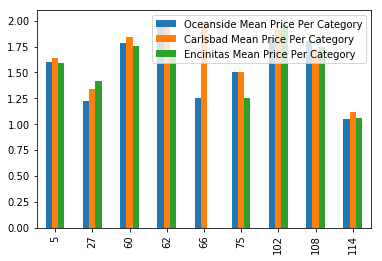

In [34]:
OCE_Asian_Restarants_Price.plot(kind='bar')